# Multilayer perceptron impl from scratch for regression problem with mse error and sigmoid activation fuction

In [1]:
import numpy as np
from random import random

class MLP(object):
    
    def __init__(self, n_inputs = 3, n_hidden = [3,3], n_output = 2):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_output = n_output
        
        layers = [self.n_inputs] + self.n_hidden + [self.n_output]
        
        # init random weights
        weights  = []
        
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
            
        self.weights  = weights
       
    
        # init storage for activations
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
            
        self.activations = activations
        
        
        # init storage for activations
        derivatives = []
        for i in range(len(layers)-1):
            d = np.zeros((layers[i], layers[i+1]) )
            derivatives.append(d)
            
        self.derivatives = derivatives
           
            
            
    def forward_propagate(self, inputs):
        
        activations = inputs
        self.activations[0] = inputs
        
        
        for i, w in enumerate(self.weights):
            
            net_inputs = np.dot(activations, w)
            
            activations = self._sigmoid(net_inputs)
            self.activations[i+1] = activations
            
        return activations
    
    def back_propagate(self, error, verbose = False):
        
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_derivative(activations)
            # reshape delta for canculations
            delta_reshaped = delta.reshape(delta.shape[0], -1).T
            
            current_activations = self.activations[i]
            # reshape current_activations for canculations 
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            
            
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            
            error = np.dot(delta, self.weights[i].T)
            if verbose:
                print('Derivatives for W{}: {}'.format(i, self.derivatives[i]))
        return error
    
    def gradient_descent(self, learning_rate):
        
        for i in range(len(self.weights)):
            weight = self.weights[i]
#             print('Original W{} {}'.format(i, weight))
            
            derivatives = self.derivatives[i]
            
            weight += derivatives*learning_rate
#             print('After learning W{} {}'.format(i, weight))
    
    
    def train(self, inputs, targets, epochs, learning_rate, verbose = False):
        
        for i in range(epochs):
            sum_error = 0
            for input_, target in zip(inputs, targets):
                # perform forward propagation
                output = self.forward_propagate(input_)

                # calculate error
                error = target - output

                # back propagation
                self.back_propagate(error)

                # apply gradient descent
                self.gradient_descent(learning_rate = learning_rate)
                
                sum_error +=self.mse_loss(target, output)
                
            # report erro for each epoch
            if verbose:
                print('Error: {} at epoch {} '.format(sum_error/len(inputs), i))
        
    
    
    
    
    def mse_loss(self, target, output):
        return np.average((target - output)**2)
        
        
        
        
    
    def _sigmoid_derivative(self, x):
        return x*(1.0 - x)
        
             
        
    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y

In [2]:
NNb = MLP(2, [5], 1)

# create a dataset to train a network for the sum operation
items = np.array([[random()/2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in items])

# train net
NNb.train(items, targets, 50, 0.1, verbose = False)


# create dummy data
input_ = np.array([0.3, 0.1])
target = np.array([0.4])

# get a prediction
output = NNb.forward_propagate(input_)
print(NNb.mse_loss(output, target))
output

3.319795020224185e-07


array([0.39942382])

# Get data for reggression problem from sklearn.datasets

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, n_informative=2, n_targets=1,  shuffle=True, coef=False, random_state=42)

# Visualize data

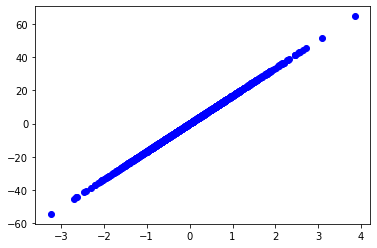

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'bo')
plt.show()

# Split data to train and test 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=42)

In [6]:
# impl bias for reg, we dont have it, thats can be the problem ?

In [7]:
mlp = MLP(1, [16,8], 1) # one hidden layer with 3 neurons
mlp.train(X_train, y_train, 50, 0.5, verbose = False)


In [8]:
output = mlp.forward_propagate(X_test)
mlp.mse_loss(output = output, target = y_test)

73.3073985361013

# Regression solution with keras Sequential model with the same properties

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.optimizers import SGD

In [10]:
# Set the input shape
input_shape = (1,)
print(f'Feature shape: {input_shape}')
# Create the model
model = Sequential()
model.add(Dense(16, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Configure the model and start training
opt = SGD(learning_rate=0.5)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0, validation_split=0.2)

Feature shape: (1,)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 974us/sample - loss: 4.1161 - mean_squared_error: 16.9421


[4.116083145141602, 16.94214]

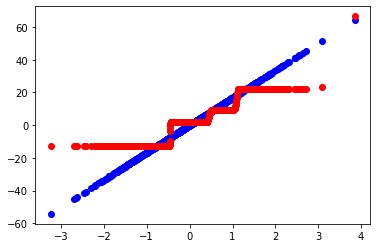

In [12]:
yp1 = model.predict(X)
plt.plot(X, y, 'bo')
plt.plot(X, yp1, 'ro')
plt.show()

# Obviously this simple model is not enough for regression actual data

If we will use relu(or linear because of nature of givven data) activations and adam optimizer model work a lot better. 

Because Adam is modified SGD. And relu shows good results with a lot of data.

A way better results can be achieved after tunning hyperparams for specific data

In [13]:
# Create the model
amodel = Sequential()
amodel.add(Dense(16, input_shape=input_shape, activation='relu'))
amodel.add(Dense(8, activation='relu'))
amodel.add(Dense(1, activation='linear'))

# Configure the model and start training

amodel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
amodel.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0, validation_split=0.2)

In [14]:
amodel.evaluate(X_test, y_test)

1/1 [==============================] - 0s 0s/sample - loss: 0.0596 - mean_squared_error: 0.0036


[0.059607505798339844, 0.0035530548]

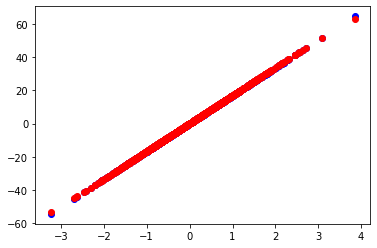

In [15]:
yp = amodel.predict(X)
plt.plot(X, y, 'bo')
plt.plot(X, yp, 'ro')
plt.show()